# 장애인콜택시 대기시간 예측
## 단계3. 모델링

## 0.미션

* 1.시계열 데이터에 맞는 전처리
    * 데이터가 2015 ~ 2022년까지 데이터 입니다.
    * 이 중 2022년 10월 ~ 2022년 12월까지(3개월)의 데이터는 성능 검증용으로 사용합니다.
    * 나머지 데이터를 이용하여 학습 및 튜닝을 수행합니다.
    * 이를 위한 데이터 전처리를 수행하시오.
* 2.모델 최적화
    * 머신러닝 
        * 알고리즘 중 3가지 이상을 선정하여 모델링을 수행합니다.
        * 각각 알고리즘에 맞는 튜닝 방법으로 최적의 모델을 만듭니다.
    * 딥러닝
        * 모델 구조를 2가지 이상을 생성하고 모델링을 수행합니다.
        * epochs, learning_rate 등을 조절하며 성능을 튜닝합니다.
    * 성능 평가
        * 시계열 그래프로 모델의 실제값과 예측값을 시각화하여 비교합니다.
        * 성능 지표 (MAE, MAPE) 를 사용해 가장 성능이 높은 모델을 선정합니다.

## 1.환경설정

### (1) 라이브러리 불러오기

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

### (2) 데이터 로딩
* 주어진 데이터셋
    * [2.탐색적 데이터분석] 단계에서 저장한 파일 : data2.pkl
* 다음의 두가지 방법 중 하나를 선택하시오.
    * 1) 로컬 수행(Ananconda)
    * 2) 구글콜랩

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 3) 데이터 읽어오기

In [2]:
import joblib

data = joblib.load('/content/drive/MyDrive/16 Mini Project06/3-4일차. 장애인 이동권 개선을 위한 장애인 콜택시 대기시간 예측/data2.pkl')

## 2.데이터 준비
* **세부요구사항**
    * NaN에 대한 조치를 수행하시오.
        * rolling 혹은 shift로 발생된 초기 행의 NaN은 삭제해도 무방합니다.
    * 가변수화 : 범주형에 대해서 가변수화를 수행합니다.
    * 데이터분할
        * 시계열 데이터 특성에 맞게 분할합니다.
        * 마지막 91일(3개월) 데이터를 검증셋으로 사용합니다.

### (1) NA 조치

In [3]:
data.isna().sum()

Date                     0
operation                0
receive                  0
board                    0
mean_waiting_time        0
mean_fare                0
mean_distance            0
temp_max                 0
temp_min                 0
rain(mm)                 0
humidity_max(%)          0
humidity_min(%)          0
sunshine(MJ/m2)          0
day_of_week              0
month                    0
year                     0
season                   0
holiday                  0
mean_waiting_time_MA7    0
boarding_rate            0
dtype: int64

### (2) 가변수화

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2921 entries, 0 to 2920
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   2921 non-null   datetime64[ns]
 1   operation              2921 non-null   int64         
 2   receive                2921 non-null   int64         
 3   board                  2921 non-null   int64         
 4   mean_waiting_time      2921 non-null   float64       
 5   mean_fare              2921 non-null   int64         
 6   mean_distance          2921 non-null   int64         
 7   temp_max               2921 non-null   float64       
 8   temp_min               2921 non-null   float64       
 9   rain(mm)               2921 non-null   float64       
 10  humidity_max(%)        2921 non-null   float64       
 11  humidity_min(%)        2921 non-null   float64       
 12  sunshine(MJ/m2)        2921 non-null   float64       
 13  day

In [9]:
data = pd.get_dummies(data, columns=['day_of_week', 'month', 'season', 'holiday'], drop_first=True)
data.head()

,Date,operation,receive,board,mean_waiting_time,mean_fare,mean_distance,temp_max,temp_min,rain(mm),...,month_Jul,month_Aug,month_Sept,month_Oct,month_Nov,month_Dec,season_Summer,season_Fall,season_Winter,holiday_1
0,2015-01-02,420,3158,2839,26.2,2216,8611,2.4,-9.2,0.0,...,0,0,0,0,0,0,0,0,1,0
1,2015-01-03,209,1648,1514,24.5,2377,10198,8.2,0.2,0.0,...,0,0,0,0,0,0,0,0,1,0
2,2015-01-04,196,1646,1526,26.2,2431,10955,7.9,-0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
3,2015-01-05,421,4250,3730,23.6,2214,8663,4.1,-7.4,3.4,...,0,0,0,0,0,0,0,0,1,0
4,2015-01-06,417,3991,3633,24.7,2211,8545,-1.0,-8.8,0.0,...,0,0,0,0,0,0,0,0,1,0


### (3) 데이터분할
* **세부요구사항**
    * 마지막 91일 간의 데이터를 검증 셋으로 만듭니다. (2022-10-01 ~ )
    * 이 기간의 날짜 리스트를 별도로 저장하여, 모델 검증시 시각화할 때 활용합니다.

In [20]:
val_data = data.loc[data['Date'] >= '2022-10-01', ['Date', 'mean_waiting_time']].copy()
val_data

,Date,mean_waiting_time
2830,2022-10-01,36.4
2831,2022-10-02,24.9
2832,2022-10-03,41.0
2833,2022-10-04,48.4
2834,2022-10-05,46.5
...,...,...
2916,2022-12-26,44.4
2917,2022-12-27,44.8
2918,2022-12-28,52.5
2919,2022-12-29,38.3


#### 1) x, y 나누기

In [15]:
target = 'mean_waiting_time'
x = data.drop([target, 'Date'], axis=1)
y = data.loc[:, target]

#### 2) train : validation 나누기
* 힌트 : train_test_split(  ,   ,  test_size = 91, shuffle = False) 

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=91, shuffle=False)

### (4) Scaling
* KNN, SVM 알고리즘 및 DL을 적용하기 위해서는 스케일링을 해야 합니다.

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링
* **세부요구사항**
    * 머신러닝 알고리즘 중 3가지 이상을 사용하여 모델을 만들고 튜닝을 수행합니다.
    * 딥러닝 모델 구조 2가지 이상을 설계하고 모델을 생성합니다.
    * 성능 측정은 MAE, MAPE로 수행합니다.
    * 모델링 후 실제값과 예측값을 시각화(라인차트)하여 분석합니다.

In [54]:
results = {}

### (1) 머신러닝

#### 1) 모델1

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
pred_lr = model_lr.predict(x_val)
print(f'MAE : {mean_absolute_error(y_val, pred_lr)}, MAPE : {mean_absolute_percentage_error(y_val, pred_lr)}')

MAE : 3.8132758975694894, MAPE : 0.09611238053024573


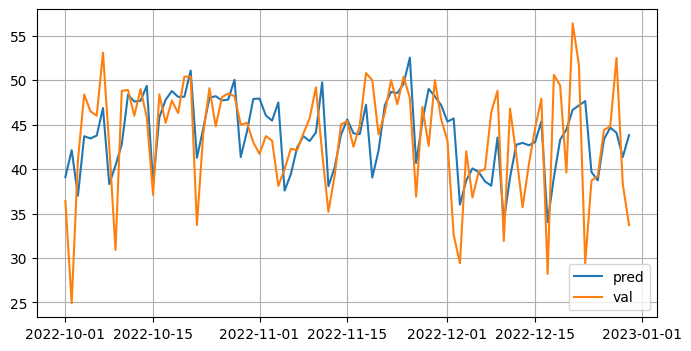

In [26]:
plt.figure(figsize=(8, 4))
plt.plot(val_data['Date'], pred_lr, label='pred')
plt.plot(val_data['Date'], val_data['mean_waiting_time'], label='val')
plt.legend()
plt.grid()
plt.show()

In [56]:
results['LinearRegression'] = mean_absolute_error(y_val, pred_lr)

#### 2) 모델2

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

model_rfg = RandomForestRegressor()
model_rfg.fit(x_train, y_train)
pred_rfg = model_rfg.predict(x_val)
print(f'MAE : {mean_absolute_error(y_val, pred_rfg)}, MAPE : {mean_absolute_percentage_error(y_val, pred_rfg)}')

MAE : 4.195725274725273, MAPE : 0.10374309036184094


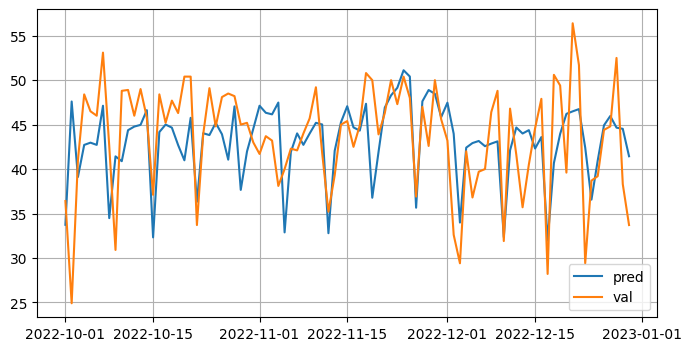

In [27]:
plt.figure(figsize=(8, 4))
plt.plot(val_data['Date'], pred_rfg, label='pred')
plt.plot(val_data['Date'], val_data['mean_waiting_time'], label='val')
plt.legend()
plt.grid()
plt.show()

In [57]:
results['RandomForestRegressor'] = mean_absolute_error(y_val, pred_rfg)

#### 3) 모델3

In [29]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

model_xgb = XGBRegressor()
model_xgb.fit(x_train, y_train)
pred_xgb = model_xgb.predict(x_val)
print(f'MAE : {mean_absolute_error(y_val, pred_xgb)}, MAPE : {mean_absolute_percentage_error(y_val, pred_xgb)}')

MAE : 4.657095429137512, MAPE : 0.11470042912485852


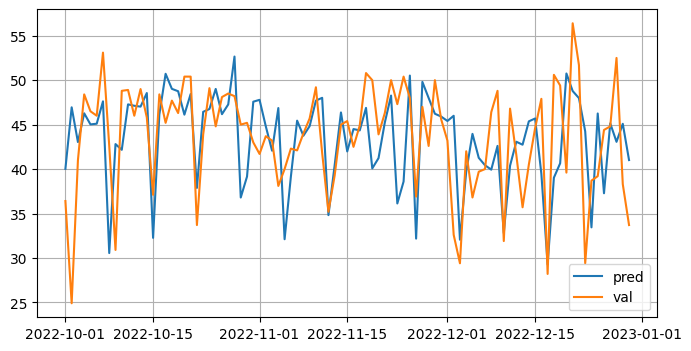

In [30]:
plt.figure(figsize=(8, 4))
plt.plot(val_data['Date'], pred_xgb, label='pred')
plt.plot(val_data['Date'], val_data['mean_waiting_time'], label='val')
plt.legend()
plt.grid()
plt.show()

In [58]:
results['XGBRegressor'] = mean_absolute_error(y_val, pred_xgb)

### (2) 딥러닝

In [35]:
x_train.shape, y_train.shape

((2830, 35), (2830,))

#### 1) 모델1

In [75]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

In [78]:
keras.backend.clear_session()

model = Sequential()
model.add(Input(shape=(35, )))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mae', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               9216      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


In [79]:
history = model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=1)
pred_d1 = model.predict(x_val)
print(f'MAE : {mean_absolute_error(y_val, pred_d1)}, MAPE : {mean_absolute_percentage_error(y_val, pred_d1)}')

Epoch 1/100
23/23 [==============================] - 1s 3ms/step - loss: 39.2062
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 35.6249
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 29.7141
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 20.9791
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 13.2041
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 10.9868
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 10.8539
Epoch 8/100
23/23 [==============================] - 0s 3ms/step - loss: 10.6757
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 10.5658
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 10.2919
Epoch 11/100
23/23 [==============================] - 0s 3ms/step - loss: 10.1469
Epoch 12/100
23/23 [==============================] - 0s 3ms/step - loss: 10.0486
Epoch 13/100
23/23 [=====

3/3 [==============================] - 0s 4ms/step
MAE : 3.8988063434978106, MAPE : 0.097652497981547


In [80]:
results['DeapLearning1'] = mean_absolute_error(y_val, pred_d1)

#### 2) 모델2

In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [91]:
keras.backend.clear_session()

model2 = Sequential()
model2.add(Input(shape=(35, )))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1))

model2.compile(loss='mae', optimizer='adam')
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               18432     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [92]:
history2 = model2.fit(x_train, y_train, batch_size=128, epochs=100, verbose=1)
pred_d2 = model2.predict(x_val)
print(f'MAE : {mean_absolute_error(y_val, pred_d2)}, MAPE : {mean_absolute_percentage_error(y_val, pred_d2)}')

Epoch 1/100
23/23 [==============================] - 1s 10ms/step - loss: 28.8657
Epoch 2/100
23/23 [==============================] - 0s 9ms/step - loss: 12.4970
Epoch 3/100
23/23 [==============================] - 0s 10ms/step - loss: 10.1613
Epoch 4/100
23/23 [==============================] - 0s 10ms/step - loss: 8.7695
Epoch 5/100
23/23 [==============================] - 0s 10ms/step - loss: 7.6449
Epoch 6/100
23/23 [==============================] - 0s 10ms/step - loss: 6.7437
Epoch 7/100
23/23 [==============================] - 0s 16ms/step - loss: 6.0559
Epoch 8/100
23/23 [==============================] - 0s 15ms/step - loss: 6.1578
Epoch 9/100
23/23 [==============================] - 0s 15ms/step - loss: 5.8395
Epoch 10/100
23/23 [==============================] - 0s 16ms/step - loss: 5.7791
Epoch 11/100
23/23 [==============================] - 0s 15ms/step - loss: 5.7456
Epoch 12/100
23/23 [==============================] - 0s 16ms/step - loss: 5.9078
Epoch 13/100
23/23 [===

In [93]:
results['DeapLearning2'] = mean_absolute_error(y_val, pred_d2)

## 4.모델 비교
* **세부요구사항**
    * 모델링 단계에서 생성한 모든 모델의 성능을 하나로 모아서 비교합니다.
    * 가장 성능이 높은 모델을 선정합니다.

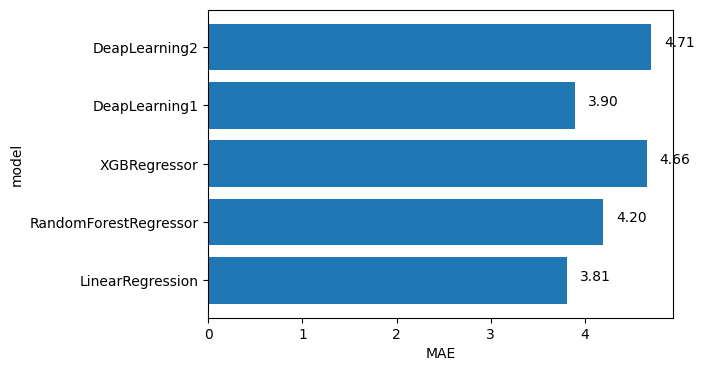

In [94]:
plt.figure(figsize=(6, 4))
bars = plt.barh(y=list(results), width=results.values())

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.3, bar.get_y() + bar.get_height()/2.0, '%.2f'%width, ha='center', size=10)

plt.xlabel('MAE')
plt.ylabel('model')

plt.show()

In [ ]:
# MAE, MAPE
# MAPE : 상대적인 비율

# 숫자-숫자 : 상관분석, 상관계수
# 범주-숫자 : t검정, 분산분석
# 숫자-범주 : 
# 범주-범주 : 카이제곱검정